In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle
sns.set(style="whitegrid")

In [2]:
# plotting helper function
def compute_missing_mean_se(data):
    mean, std = [], []
    for i in range(data.shape[0]):
        temp = []
        for j in range(data.shape[1]):
                    temp.append(data[i, j])
        temp = np.array(temp)
        mean.append(np.mean(temp))
        std.append(np.std(temp))
    return np.array(mean), np.array(std)/np.sqrt(data.shape[0])

def compute_mean_se(data, x='meo_mp', y='acc_mp'):
    acc_mp_mean, acc_mp_se = compute_missing_mean_se(data[y])
    fr_mp_mean, fr_mp_se = compute_missing_mean_se(data[x])
    return [fr_mp_mean, acc_mp_mean, fr_mp_se, acc_mp_se]

def plot_multi(ax, data, x, y, idx, marker, color, n=10, label = "", alpha=1.0, markersize = 5.):
    ax.errorbar(np.array(data[x+'_mean'])[idx], np.array(data[y+'_mean'])[idx], 
                xerr=np.array(data[x+'_std'])[idx]/np.sqrt(n), yerr=np.array(data[y+'_std'])[idx]/np.sqrt(n), marker=marker, label = label, color=color,alpha=alpha, markersize = markersize)

def plot_leverage(ax, data, x, y, label, marker, color,n=10):
    ax.errorbar(data[x].mean(), data[y].mean(), 
                xerr=data[x].std()/np.sqrt(n), yerr=data[y].std()/np.sqrt(n), marker=marker, linestyle = '', markersize=7, label = label, color=color)

def plot_point(ax, data, x, y, label, marker, color, n=10):
    ax.errorbar(data[x+'_mean'], data[y+'_mean'], xerr=data[x+'_std']/np.sqrt(n), yerr=data[y+'_std']/np.sqrt(n), marker=marker, linestyle = '', markersize=7, label = label, color=color)

def plot_mp(ax, data, x, y, idx, marker, color,n=10, label = "", alpha = 1.0):
    mean_se = compute_mean_se(data, x, y)
    ax.errorbar(np.abs(mean_se[0][idx]), mean_se[1][idx], xerr=mean_se[2][idx]/np.sqrt(n), yerr=mean_se[3][idx]/np.sqrt(n), 
                marker=marker, color=color, markersize=5, label = label, alpha=alpha)


#### Benchmark comparison for Adult dataset


In [45]:
# Curve generated from FairFront notebook
adult_opt_list = [0.8278810645443481,
 0.8300821402616694,
 0.832283216584571,
 0.8344842897489709,
 0.8366853658643512,
 0.8388864402862597,
 0.8410875158864694,
 0.8432834014965912,
 0.8448077852367388,
 0.8457348062463301,
 0.8463685033586705,
 0.8464486409948844,
 0.8464486405219646,
 0.8464486404170134,
 0.8464486405910898]

epsilon = [0.0,
 0.006666666666666666,
 0.013333333333333332,
 0.019999999999999997,
 0.026666666666666665,
 0.03333333333333333,
 0.039999999999999994,
 0.04666666666666666,
 0.05333333333333333,
 0.06,
 0.07,
 0.09,
 0.11,
 0.13,
 0.15]

In [46]:
# load datasets 

    
# reduction
with open('temp/adult_reduction_rf_s42_eo.pkl', 'rb+') as f: 
    adult_modified_reduction_resampled = pickle.load(f)


# rejection
# with open('temp1/adult_roc_rf_s42_eo.pkl', 'rb+') as f: 
#     adult_modified_rejection_resampled = pickle.load(f)


# eqodds
with open('temp/adult_eqodds_rf_s42_eo.pkl', 'rb+') as f: 
    adult_modified_eqodds_resampled = pickle.load(f)


# caleqodds
with open('temp/adult_caleqodds_rf_s42_eo.pkl', 'rb+') as f: 
    adult_modified_caleqodds_resampled = pickle.load(f)


# leveraging
with open('temp/adult_leveraging_rf_s42_eo.pkl', 'rb+') as f: 
    adult_modified_leveraging_resampled = pickle.load(f)


#fair-projection 
with open('temp/adult_fairprojection_eo.pkl', 'rb+') as f: 
    adult_modified_mp_resampled = pickle.load(f)


# original 
with open('temp/adult_original_rf_s42_eo.pkl', 'rb+') as f: 
    adult_modified_original_resampled = pickle.load(f)



Text(0.5, 1.0, 'Adult')

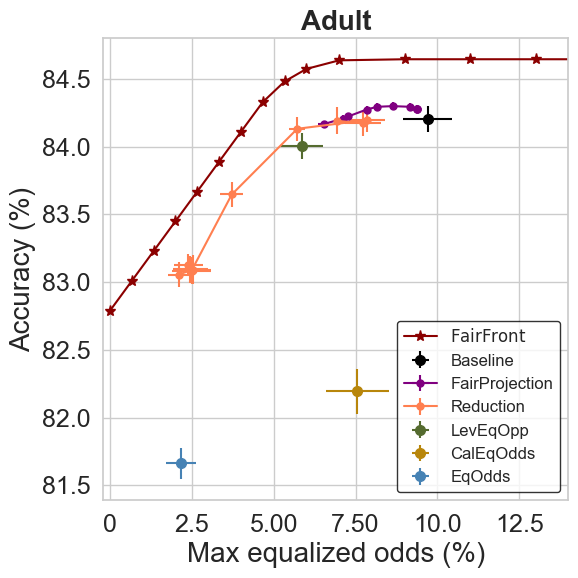

In [47]:
# create a figure
fig, ax = plt.subplots(figsize=(6, 6))


from matplotlib.ticker import FuncFormatter
def oneK(x, pos):
    if x == 0:
        a = str(0)
    else:
        a = str(x*100)
        a=a[:4]
    return a

formatter = FuncFormatter(oneK)
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)


# color codes
# reduction - coral, rejection-gold, eqodds - steelblue, calibration - darkgoldenrod, leveraging - darkolivegreen


#FairFront
ax.plot(epsilon, adult_opt_list, color='darkred', label = r'$\mathsf{FairFront}$', marker = '*', markersize=8)

#baseline
ax.errorbar(adult_modified_original_resampled['abseo_mean'], adult_modified_original_resampled['acc_mean'], xerr = adult_modified_original_resampled['abseo_std']/np.sqrt(10), yerr = adult_modified_original_resampled['acc_std']/np.sqrt(10), marker='o', linestyle = '', markersize=7, color='black', label='Baseline', zorder=10)


# fair projection 
plot_mp(ax, adult_modified_mp_resampled['rfc_ce_meo'], 'mo', 'acc', np.arange(10), 'o', 'purple',n=10, label = "FairProjection")

#plot_mp(ax, adult_modified_mp_resampled['rfc_ce_meo'], 'meo', 'acc', np.arange(10), 'o', 'purple',n=10, label = "FairProjection")


#reduction
plot_multi(ax, adult_modified_reduction_resampled, 'abseo', 'acc', np.arange(10), 'o', 'coral', n=10, label = 'Reduction')


#leveraging
plot_leverage(ax, adult_modified_leveraging_resampled, 'meo', 'acc',  'LevEqOpp', 'o', 'darkolivegreen')


#caleqodds
plot_point(ax, adult_modified_caleqodds_resampled, 'abseo', 'acc', 'CalEqOdds', 'o', 'darkgoldenrod')

#eqodds
plot_point(ax, adult_modified_eqodds_resampled, 'abseo', 'acc', 'EqOdds', 'o', 'steelblue')

#rejection
#plot_multi(ax, adult_modified_rejection_resampled, 'abseo', 'acc', np.arange(4), 'o', 'gold', n=2, label = 'Rejection')



ax.set_xlabel('Max equalized odds (%)', fontsize=20)
ax.set_ylabel('Accuracy (%)', fontsize=20)
# ax.grid()
ax.legend(loc='lower right', fontsize=12, fancybox=True, edgecolor='black')




ax.set_xlim(-0.002, 0.14)
#ax.set_ylim(-0.001, 1.0)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.set_title('Adult', size = 20, fontweight="bold")



#plt.savefig('./result_graphs/Adult_benchmark.jpg', format='jpg', dpi=300, bbox_inches='tight')



#### Benchmark comparison for COMPAS dataset

In [13]:
# Curve generated from FairFront notebooks
compas_opt_list =  [0.7619731135192416,  0.7642010888457312,
 0.7664290662014359,
 0.7684459326675182,
 0.7693023662618514,
 0.7695894794537131,
 0.7700426484830303,
 0.7704106330275383,
 0.7707584735692864,
 0.7710930044743646,
 0.7713712141038397,
 0.7715043582490189,
 0.7715043580587263,
 0.7715043578750099,
 0.771504357732582,
 0.7715043577381109,
 0.7715043577607672,
 0.771504357766011,
 0.771504360225664]


epsilon = [0.0,  0.003703703703703704,
 0.007407407407407408, 
 0.011111111111111112,
 0.016666666666666666,
 0.022222222222222223,
 0.03333333333333333,
 0.044444444444444446,
 0.05555555555555556,
 0.06666666666666667,
 0.07777777777777778,
 0.08888888888888889,
 0.1,
 0.111,
 0.1348,
 0.15860000000000002,
 0.1824,
 0.2062,
 0.23]

In [14]:
# reduction
with open('temp/compas_reduction_rf_s42_eo.pkl', 'rb+') as f: 
    compas_reduction = pickle.load(f)


# rejection
with open('temp/compas_roc_rf_s42_eo.pkl', 'rb+') as f: 
    compas_rejection = pickle.load(f)

# eqodds
with open('temp/compas_eqodds_rf_s42_eo.pkl', 'rb+') as f: 
    compas_eqodds = pickle.load(f)

# caleqodds
with open('temp/compas_caleqodds_rf_s42_eo.pkl', 'rb+') as f: 
    compas_caleqodds = pickle.load(f)

# leveraging
with open('temp/compas_leveraging_rf_s42_eo.pkl', 'rb+') as f: 
    compas_leveraging = pickle.load(f)

#fair-projection 
with open('temp/compas_fairprojection_eo.pkl', 'rb+') as f: 
    compas_mp = pickle.load(f)


# Baseline
with open('temp/compas_original_rf_s42_eo.pkl', 'rb+') as f: 
    compas_original = pickle.load(f)

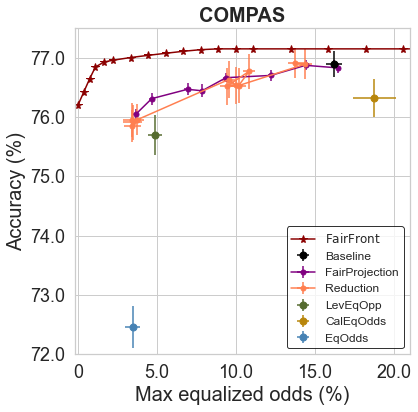

In [17]:
# create figure
fig, ax = plt.subplots(figsize=(6, 6))


from matplotlib.ticker import FuncFormatter
def oneK(x, pos):
    if x == 0:
        a = str(0)
    else:
        a = str(x*100)
        a=a[:4]
    return a

formatter = FuncFormatter(oneK)
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)


# color codes
# reduction - coral, rejection-gold, eqodds - steelblue, calibration - darkgoldenrod, leveraging - darkolivegreen

#FairFront
ax.plot(epsilon, compas_opt_list, color='darkred', label = r'$\mathsf{FairFront}$', marker = '*', markersize=8)

#baseline
ax.errorbar(compas_original['abseo_mean'], compas_original['acc_mean'], xerr = compas_original['abseo_std']/np.sqrt(10), yerr = compas_original['acc_std']/np.sqrt(10), marker='o', linestyle = '', markersize=7, color='black', label='Baseline', zorder=10)

# fair projection 
plot_mp(ax, compas_mp['rfc_ce_meo'], 'mo', 'acc', np.arange(10), 'o', 'purple',n=10, label = "FairProjection")


#reduction
plot_multi(ax, compas_reduction, 'abseo', 'acc', np.arange(11), 'o', 'coral', n=10, label = 'Reduction')


#leveraging
plot_leverage(ax, compas_leveraging, 'meo', 'acc',  'LevEqOpp', 'o', 'darkolivegreen')

#caleqodds
plot_point(ax, compas_caleqodds, 'abseo', 'acc', 'CalEqOdds', 'o', 'darkgoldenrod')

#eqodds
plot_point(ax, compas_eqodds, 'abseo', 'acc', 'EqOdds', 'o', 'steelblue')

#rejection
#plot_multi(ax, compas_rejection, 'abseo', 'acc', np.arange(4), 'o', 'gold', n=10, label = 'Rejection')


ax.set_xlabel('Max equalized odds (%)', fontsize=20)
ax.set_ylabel('Accuracy (%)', fontsize=20)
# ax.grid()
ax.legend(loc='lower right', fontsize=12, fancybox=True, edgecolor='black')


ax.set_xlim(-0.002, 0.21)
ax.set_ylim(0.72, 0.775)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.set_title('COMPAS', size = 20, fontweight="bold")

plt.savefig('./result_graphs/COMPAS_benchmark.jpg', format='jpg', dpi=300, bbox_inches='tight')




### Visualize fairness implication of missing value (Adult dataset)

In [37]:
# load datasets 

#FairFront
with open('missing_values/adult_10_10/adult_10_10fairfront.pkl', 'rb+') as f: 
    Adult_perturbed_maj10_min10_ff = pickle.load(f)

with open('missing_values/adult_10_50/adult_10_50fairfront.pkl', 'rb+') as f: 
    Adult_perturbed_maj10_min50_ff = pickle.load(f)

with open('missing_values/adult_10_70/adult_10_70fairfront.pkl', 'rb+') as f: 
    Adult_perturbed_maj10_min70_ff = pickle.load(f)



# Baseline
with open('missing_values/adult_10_10/adult_10_10original_rf_s42_eo.pkl', 'rb+') as f: 
    Adult_perturbed_maj10_min10_base = pickle.load(f)

with open('missing_values/adult_10_50/adult_10_50original_rf_s42_eo.pkl', 'rb+') as f: 
    Adult_perturbed_maj10_min50_base = pickle.load(f)

with open('missing_values/adult_10_70/adult_10_70original_rf_s42_eo.pkl', 'rb+') as f: 
    Adult_perturbed_maj10_min70_base = pickle.load(f)



# Reduction
with open('missing_values/adult_10_10/adult_10_10reduction_rf_s42_eo.pkl', 'rb+') as f: 
    Adult_perturbed_maj10_min10_red = pickle.load(f)

with open('missing_values/adult_10_50/adult_10_50reduction_rf_s42_eo.pkl', 'rb+') as f: 
    Adult_perturbed_maj10_min50_red = pickle.load(f)

with open('missing_values/adult_10_70/adult_10_70reduction_rf_s42_eo.pkl', 'rb+') as f: 
    Adult_perturbed_maj10_min70_red = pickle.load(f)

# Reduction extension

with open('missing_values/adult_10_50/reduction_rf_s42_eolonger.pkl', 'rb+') as f: 
    Adult_perturbed_maj10_min50_red_more = pickle.load(f)

with open('missing_values/adult_10_50/reduction_rf_s42_eolonger_more.pkl', 'rb+') as f: 
    Adult_perturbed_maj10_min50_red_more_2 = pickle.load(f)

with open('missing_values/adult_10_70/reduction_rf_s42_eolonger.pkl', 'rb+') as f: 
    Adult_perturbed_maj10_min70_red_more = pickle.load(f)

with open('missing_values/adult_10_70/reduction_rf_s42_eolonger_more.pkl', 'rb+') as f: 
    Adult_perturbed_maj10_min70_red_more_2 = pickle.load(f)



# Fair Projection
with open('missing_values/adult_10_10/adult_10_10fairprojection.pkl', 'rb+') as f: 
    Adult_perturbed_maj10_min10_fp = pickle.load(f)

with open('missing_values/adult_10_50/adult_10_50fairprojection.pkl', 'rb+') as f: 
    Adult_perturbed_maj10_min50_fp = pickle.load(f)

with open('missing_values/adult_10_70/adult_10_70fairprojection.pkl', 'rb+') as f: 
    Adult_perturbed_maj10_min70_fp = pickle.load(f)


In [38]:
for field in ['abseo_mean', 'abseo_std', 'acc_mean', 'acc_std']:
    Adult_perturbed_maj10_min50_red[field] = Adult_perturbed_maj10_min50_red[field]  + Adult_perturbed_maj10_min50_red_more[field] 
    Adult_perturbed_maj10_min70_red[field] = Adult_perturbed_maj10_min70_red[field]  + Adult_perturbed_maj10_min70_red_more[field] 
    
    Adult_perturbed_maj10_min50_red[field] = Adult_perturbed_maj10_min50_red[field]  + Adult_perturbed_maj10_min50_red_more_2[field] 
    Adult_perturbed_maj10_min70_red[field] = Adult_perturbed_maj10_min70_red[field]  + Adult_perturbed_maj10_min70_red_more_2[field] 

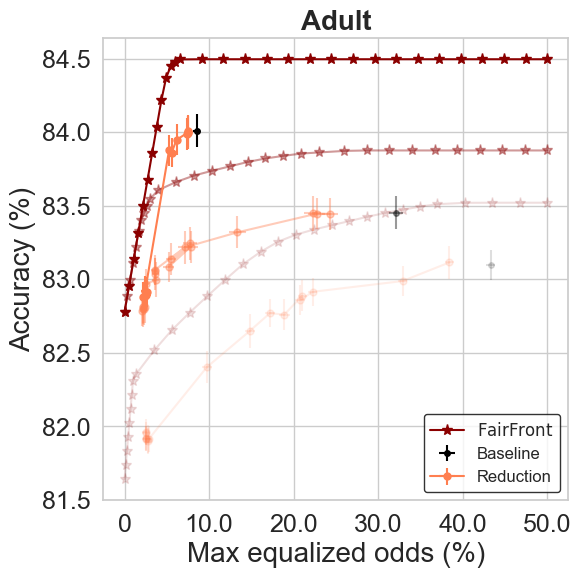

In [49]:
alpha1=0.4
alpha2=0.13

# create a figure
fig, ax = plt.subplots(figsize=(6, 6))


from matplotlib.ticker import FuncFormatter
def oneK(x, pos):
    if x == 0:
        a = str(0)
    else:
        a = str(x*100)
        a=a[:4]
    return a

formatter = FuncFormatter(oneK)
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)


# color codes
# reduction - coral, rejection-gold, eqodds - steelblue, calibration - darkgoldenrod, leveraging - darkolivegreen

#FairFront
ax.plot(Adult_perturbed_maj10_min10_ff['eps'], Adult_perturbed_maj10_min10_ff['FairFront'], color='darkred', marker = '*', markersize=8, label =  r'$\mathsf{FairFront}$')
ax.plot(Adult_perturbed_maj10_min50_ff['eps'], Adult_perturbed_maj10_min50_ff['FairFront'], color='darkred', marker = '*', markersize=8, alpha=alpha1)
ax.plot(Adult_perturbed_maj10_min70_ff['eps'], Adult_perturbed_maj10_min70_ff['FairFront'], color='darkred', marker = '*', markersize=8, alpha=alpha2)


#baseline
ax.errorbar(Adult_perturbed_maj10_min10_base['abseo_mean'], Adult_perturbed_maj10_min10_base['acc_mean'], xerr = Adult_perturbed_maj10_min10_base['abseo_std']/np.sqrt(10), yerr = Adult_perturbed_maj10_min10_base['acc_std']/np.sqrt(10), marker='o', linestyle = '', markersize=4, color='black', zorder=10, label = 'Baseline')
ax.errorbar(Adult_perturbed_maj10_min50_base['abseo_mean'], Adult_perturbed_maj10_min50_base['acc_mean'], xerr = Adult_perturbed_maj10_min50_base['abseo_std']/np.sqrt(10), yerr = Adult_perturbed_maj10_min50_base['acc_std']/np.sqrt(10), marker='o', linestyle = '', markersize=4, color='black', zorder=10, alpha = alpha1)
ax.errorbar(Adult_perturbed_maj10_min70_base['abseo_mean'], Adult_perturbed_maj10_min70_base['acc_mean'], xerr = Adult_perturbed_maj10_min70_base['abseo_std']/np.sqrt(10), yerr = Adult_perturbed_maj10_min70_base['acc_std']/np.sqrt(10), marker='o', linestyle = '', markersize=4, color='black', zorder=10,  alpha = alpha2)


# reduction
plot_multi(ax, Adult_perturbed_maj10_min10_red, 'abseo', 'acc', np.arange(12), 'o', 'coral', n=10, label = 'Reduction')
plot_multi(ax, Adult_perturbed_maj10_min50_red, 'abseo', 'acc', np.arange(20), 'o', 'coral', n=10,  alpha = alpha1)
plot_multi(ax, Adult_perturbed_maj10_min70_red, 'abseo', 'acc', np.arange(17), 'o', 'coral', n=10,alpha = alpha2)


# fair projection 
# plot_mp(ax, Adult_perturbed_maj10_min10_fp['rfc_ce_meo'], 'mo', 'acc', np.arange(10), 'o', 'purple',n=10,label = "FairProjection" )
# plot_mp(ax, Adult_perturbed_maj10_min50_fp['rfc_ce_meo'], 'mo', 'acc', np.arange(10), 'o', 'purple',n=10,  alpha = alpha1 )
# plot_mp(ax, Adult_perturbed_maj10_min70_fp['rfc_ce_meo'], 'mo', 'acc', np.arange(10), 'o', 'purple',n=10,  alpha = alpha2 )



ax.set_xlabel('Max equalized odds (%)', fontsize=20)
ax.set_ylabel('Accuracy (%)', fontsize=20)
# ax.grid()
ax.legend(loc='lower right', fontsize=12, fancybox=True, edgecolor='black')




#ax.set_xlim(-0.002, 0.21)
#ax.set_ylim(-0.001, 1.0)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)

ax.set_title('Adult', size = 20, fontweight="bold")


#plt.savefig('./result_graphs/Adult_miss_value_comparison.jpg', format='jpg', dpi=300, bbox_inches='tight')



In [54]:
Adult_perturbed_maj10_min70_red

{'sp_mean': [0.21601097489515064],
 'sp_std': [0.005126184252103418],
 'avgeo_mean': [0.26108582075806874],
 'avgeo_std': [0.009134119203811547],
 'abseo_mean': [0.43292753228485986],
 'abseo_std': [0.017595772649126974],
 'maxeo_mean': [0.43292753228485986],
 'maxeo_std': [0.017595772649126994],
 'acc_mean': [0.8309817712071194],
 'acc_std': [0.0032712562737474233],
 'brier_mean': [0.4154908856035597],
 'brier_std': [0.4154973243938335],
 'time_mean': [0.5665889223696119],
 'time_std': [0.26548895445263776]}

### Visualize fairness implication of missing value (COMPAS dataset)

In [6]:
# load datasets 

#FairFront
with open('missing_values/compas_10_10/compas_10_10fairfront.pkl', 'rb+') as f: 
    COMPAS_perturbed_maj10_min10_ff = pickle.load(f)

with open('missing_values/compas_10_50/compas_10_50fairfront.pkl', 'rb+') as f: 
    COMPAS_perturbed_maj10_min50_ff = pickle.load(f)

with open('missing_values/compas_10_70/compas_10_70fairfront.pkl', 'rb+') as f: 
    COMPAS_perturbed_maj10_min70_ff = pickle.load(f)

# Baseline
with open('missing_values/compas_10_10/compas_10_10original_rf_s42_eo.pkl', 'rb+') as f: 
    COMPAS_perturbed_maj10_min10_base = pickle.load(f)

with open('missing_values/compas_10_50/compas_10_50original_rf_s42_eo.pkl', 'rb+') as f: 
    COMPAS_perturbed_maj10_min50_base = pickle.load(f)

with open('missing_values/compas_10_70/compas_10_70original_rf_s42_eo.pkl', 'rb+') as f: 
    COMPAS_perturbed_maj10_min70_base = pickle.load(f)

# Reduction
with open('missing_values/compas_10_10/compas_10_10reduction_rf_s42_eo.pkl', 'rb+') as f: 
    COMPAS_perturbed_maj10_min10_red = pickle.load(f)

with open('missing_values/compas_10_50/compas_10_50reduction_rf_s42_eo.pkl', 'rb+') as f: 
    COMPAS_perturbed_maj10_min50_red = pickle.load(f)

with open('missing_values/compas_10_70/compas_10_70reduction_rf_s42_eo.pkl', 'rb+') as f: 
    COMPAS_perturbed_maj10_min70_red = pickle.load(f)


# Fair Projection
with open('missing_values/compas_10_10/compas_10_10fairprojection.pkl', 'rb+') as f: 
    COMPAS_perturbed_maj10_min10_fp = pickle.load(f)

with open('missing_values/compas_10_50/compas_10_50fairprojection.pkl', 'rb+') as f: 
   COMPAS_perturbed_maj10_min50_fp = pickle.load(f)

with open('missing_values/compas_10_70/compas_10_70fairprojection.pkl', 'rb+') as f: 
    COMPAS_perturbed_maj10_min70_fp = pickle.load(f)

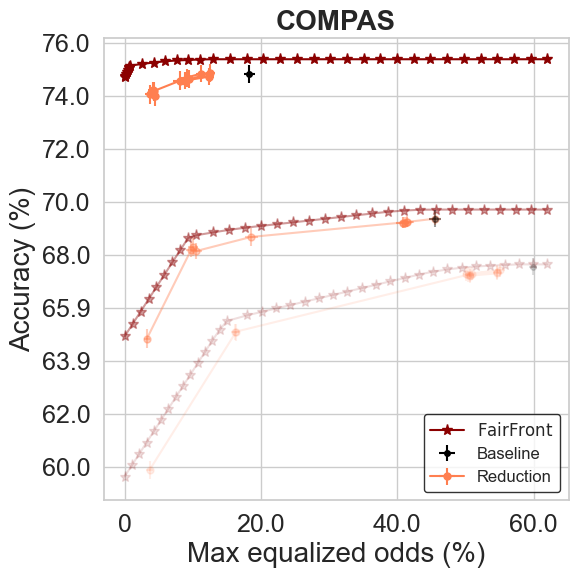

In [50]:
alpha1=0.4
alpha2=0.13

# create a figure
fig, ax = plt.subplots(figsize=(6, 6))


from matplotlib.ticker import FuncFormatter
def oneK(x, pos):
    if x == 0:
        a = str(0)
    else:
        a = str(x*100)
        a=a[:4]
    return a

formatter = FuncFormatter(oneK)
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)


# color codes
# reduction - coral, rejection-gold, eqodds - steelblue, calibration - darkgoldenrod, leveraging - darkolivegreen

# #FairFront
ax.plot(COMPAS_perturbed_maj10_min10_ff['eps'], COMPAS_perturbed_maj10_min10_ff['FairFront'], color='darkred', marker = '*', markersize=8, label =  r'$\mathsf{FairFront}$')
ax.plot(COMPAS_perturbed_maj10_min50_ff['eps'], COMPAS_perturbed_maj10_min50_ff['FairFront'], color='darkred', marker = '*', markersize=8, alpha=alpha1)
ax.plot(COMPAS_perturbed_maj10_min70_ff['eps'], COMPAS_perturbed_maj10_min70_ff['FairFront'], color='darkred', marker = '*', markersize=8, alpha=alpha2)


#baseline
ax.errorbar(COMPAS_perturbed_maj10_min10_base['abseo_mean'], COMPAS_perturbed_maj10_min10_base['acc_mean'], xerr = COMPAS_perturbed_maj10_min10_base['abseo_std']/np.sqrt(10), yerr = COMPAS_perturbed_maj10_min70_base['acc_std']/np.sqrt(10), marker='o', linestyle = '', markersize=4, color='black', zorder=10, label = 'Baseline')
ax.errorbar(COMPAS_perturbed_maj10_min50_base['abseo_mean'], COMPAS_perturbed_maj10_min50_base['acc_mean'], xerr = COMPAS_perturbed_maj10_min50_base['abseo_std']/np.sqrt(10), yerr = COMPAS_perturbed_maj10_min70_base['acc_std']/np.sqrt(10), marker='o', linestyle = '', markersize=4, color='black', zorder=10, alpha = alpha1)
ax.errorbar(COMPAS_perturbed_maj10_min70_base['abseo_mean'], COMPAS_perturbed_maj10_min70_base['acc_mean'], xerr = COMPAS_perturbed_maj10_min70_base['abseo_std']/np.sqrt(10), yerr = COMPAS_perturbed_maj10_min70_base['acc_std']/np.sqrt(10), marker='o', linestyle = '', markersize=4, color='black', zorder=10,  alpha = alpha2)



# reduction
plot_multi(ax, COMPAS_perturbed_maj10_min10_red, 'abseo', 'acc', np.arange(11), 'o', 'coral', n=10, label = 'Reduction')
plot_multi(ax, COMPAS_perturbed_maj10_min50_red, 'abseo', 'acc', np.arange(11), 'o', 'coral', n=10, alpha = alpha1)
plot_multi(ax, COMPAS_perturbed_maj10_min70_red, 'abseo', 'acc', np.arange(11), 'o', 'coral', n=10,alpha = alpha2)

# fair projection 
# plot_mp(ax, COMPAS_perturbed_maj10_min10_fp['rfc_ce_meo'], 'mo', 'acc', np.arange(10), 'o', 'purple',n=10,label = "FairProjection")
# plot_mp(ax, COMPAS_perturbed_maj10_min50_fp['rfc_ce_meo'], 'mo', 'acc', np.arange(10), 'o', 'purple',n=10,  alpha = alpha1 )
# plot_mp(ax, COMPAS_perturbed_maj10_min70_fp['rfc_ce_meo'], 'mo', 'acc', np.arange(10), 'o', 'purple',n=10,  alpha = alpha2 )


ax.set_xlabel('Max equalized odds (%)', fontsize=20)
ax.set_ylabel('Accuracy (%)', fontsize=20)
# ax.grid()
ax.legend(loc='lower right', fontsize=12, fancybox=True, edgecolor='black')




# ax.set_xlim(-0.002, 0.21)
# ax.set_ylim(0.64, 0.72)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)

ax.set_title('COMPAS', size = 20, fontweight="bold")


#plt.savefig('./result_graphs/COMPAS_miss_value_comparison.jpg', format='jpg', dpi=300, bbox_inches='tight')

